# 3. 프로젝트 : 고양이 수염 스티커 만들기

### LIBRARY IMPORT

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
print("Library Imported!")

Library Imported!


## Step 1. 이미지 불러오기

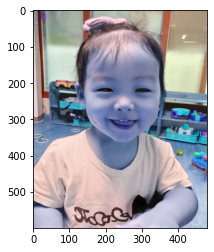

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (480, 600))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

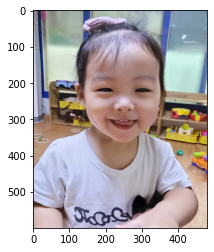

In [3]:
# OpenCV의 색상 표현 순서인 BGR에서 RGB로 바꿔준다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

### 얼굴 검출하기

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(142, 142) (365, 365)]]


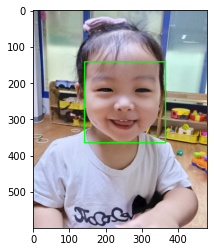

In [5]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 랜드마크 검출하기

In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#RGB 이미지와 dlib.rectangle입력받아 dlib.full_object_detection 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


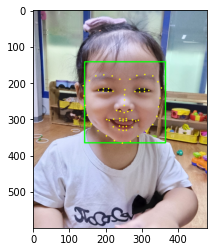

In [7]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(251, 262)
(x,y) : (251,262)
(w,h) : (224,224)


: 스티커를 붙이기 위해, 랜드마크 상의 좌표 중 코의 중심 위치인 landmark[30]을 사용한다

(194, 194, 3)


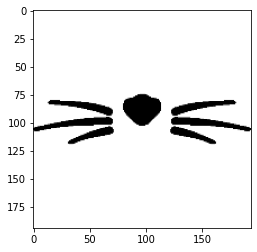

In [9]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w-30, h-30))

print (img_sticker.shape)
plt.imshow(img_sticker )

: 스티커의 크기가 얼굴에 비해 커서 사이즈를 조정해 주었다 (w-30, h-30)

In [10]:
refined_x = x - w//2 + 15     # left
refined_y = y - h//2 + 25     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (154,175)


: resize된 이미지를 코의 위치에 맞게 조정해 준다

## Step 4. 스티커 적용하기

In [11]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

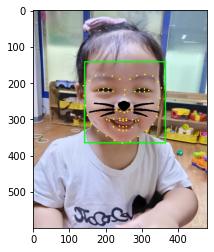

In [12]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

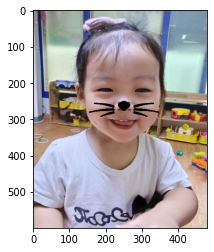

In [13]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

: 이미지에 스티커를 적용 시, 스티커의 배경으로 흰색 바탕이 나타나게 되는데,\
img_sticker의 값을 0 > 255 로 변경하여 배경을 투명하게 없애준다.

#### 문제점 1. 거리가 먼 사진

rectangles[[(461, 354) (536, 428)]]


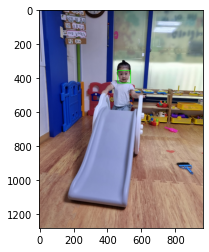

In [14]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image4.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (960, 1280))
img_show = img_bgr.copy()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector() #detector선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


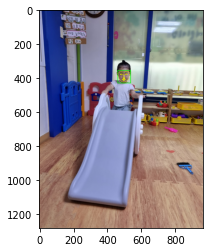

In [15]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#RGB 이미지와 dlib.rectangle입력받아 dlib.full_object_detection 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [16]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(496, 390)
(x,y) : (496,390)
(w,h) : (76,76)


(76, 76, 3)
(x,y) : (458,355)


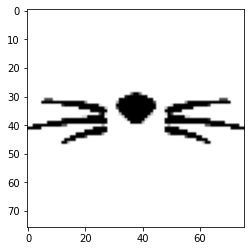

In [17]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

print (img_sticker.shape)
plt.imshow(img_sticker )

refined_x = x - w//2     # left
refined_y = y - h//2 + 3     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

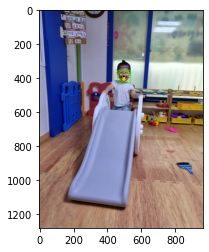

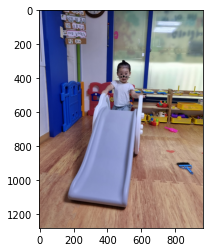

In [18]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

사진에서 인식되는 얼굴의 크기가 작아 스티커를 resize할 때나, 스티커를 얼굴에 부착할 때에 좀 더 세심한 조정을 필요로 했다.

(17, 17, 3)


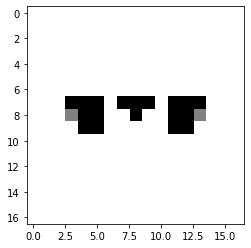

In [19]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image4.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (480, 640))

detector_hog = dlib.get_frontal_face_detector() #detector선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0] 
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w-20, h-20))

print (img_sticker.shape)
plt.imshow(img_sticker )

예를 들어, 사진의 크기를 작게 하면 인식되는 얼굴에 따른 스티커의 w, h 값도 너무 작아져서 스티커의 픽셀이 너무 낮아지게 되어 고양이의 수염이 너무 깨지는 경우가 생긴다.